In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

# Loading the data

we have data sets of 2 different type of wine. Red wine and White wine. We will load and concate these data by rows to make a merged/complete dataframe.

In [2]:
df_red = pd.read_csv('winequality-red.csv',sep=';')
df_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
df_white = pd.read_csv('winequality-white.csv',sep=';')
df_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [4]:
#we will add additional column for wine refrence as 1 and 2 to each data set respectively.
df_red["type"] = 1
df_white["type"]= 2

In [5]:
#concatenating of the above dataframes
df_all = pd.concat([df_red,df_white],axis=0)
df_all.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  
0      9.4        5     1  
1      9.8        5     1  
2      9.8        5     1  
3      9.8        6     1  
4      9.4        5     1

In [6]:
print('Shape of df_all is :',df_all.shape)

Shape of df_all is : (6497, 13)


In [7]:
#we can see that all the features/variables of the data are numeric, so it will be easy to do statistical method on the data
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [8]:
#checking missing value in the dataset by columns
df_all.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

we can see that there are no missing values in this data set , we will now go for EDA for better understanding of the data

In [9]:
df_all.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality         type  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378     1.753886  
std       0.160787     0.148806     1.192712     0.873255     0.430779  
min       2.720000     0.220000     8.000000     3.000000     1.000000  
25%       3.110000     0.430000     9.500000     5.000000     2.000000  
50%       3.210000     0.510000    10.300000     6.000000     2.000000  
75%       3.320000     0.600000    11.300000     6.000000     2.000000  
max       4.010000     2.000000    14.900000     9.000000     2.000000

with the above data we can see that quality score ranges from 3 to 9 which can be useful in the EDA process, there are high diff between Q3 and max in fixed acidity,residual sugar,free sulfur dioxide,total sulfur dioxide. there will be outliers which needs to be analysed.

In [10]:
#checking how many examples scored at diff level
df_all['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

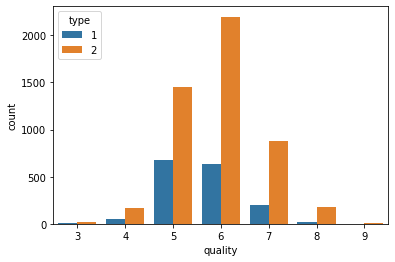

In [11]:
sns.countplot(df_all['quality'],hue=df_all['type'])

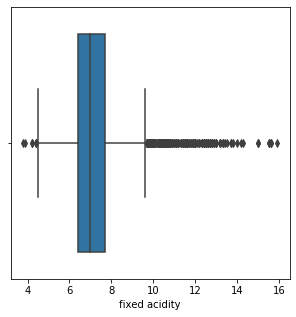

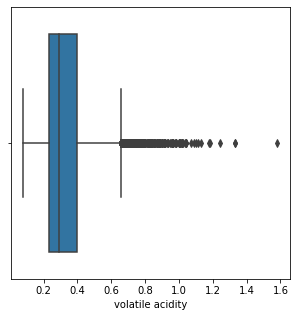

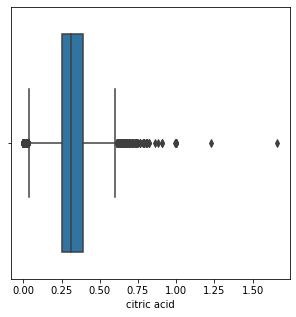

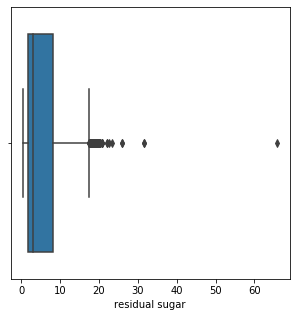

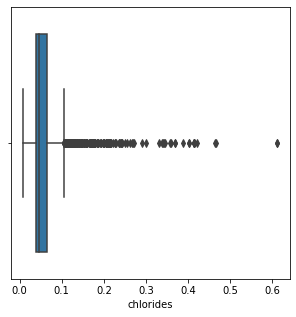

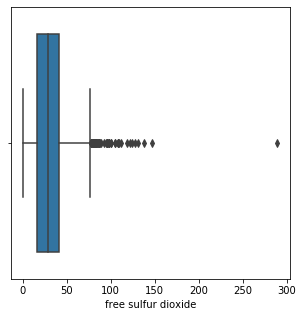

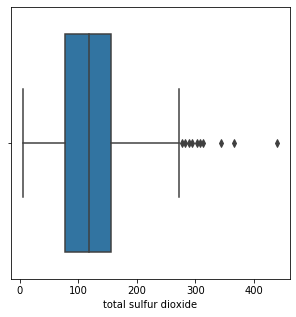

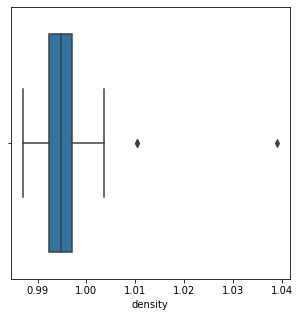

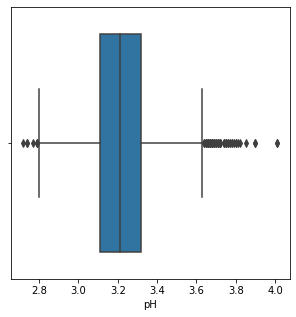

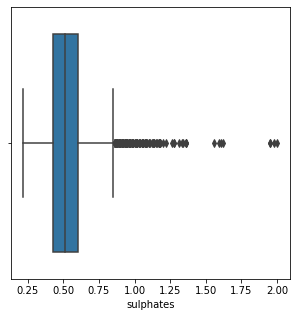

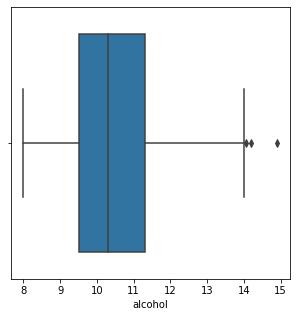

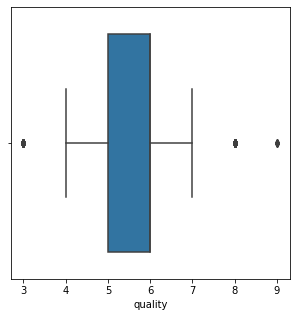

In [12]:
for i in df_all.columns:
    if i != 'type':
        plt.figure(figsize=(5,5))
        sns.boxplot(df_all[i])
        plt.show()

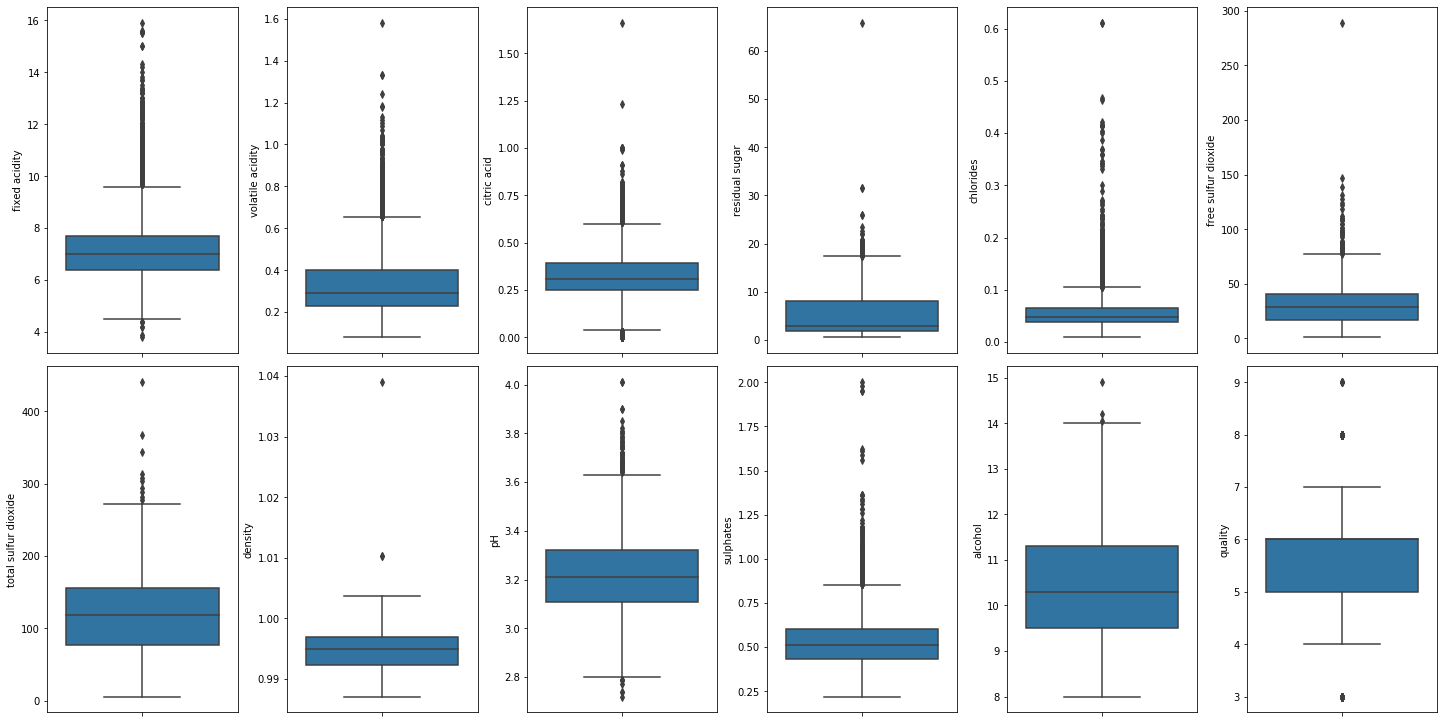

In [13]:
#plotting boxplots as subplots

fig, ax = plt.subplots(ncols=6 ,nrows=2 , figsize=(20,10))
index = 0
ax = ax.flatten()

for i,value in df_all.items():
    if i != 'type':
        sns.boxplot(y=i, data=df_all ,ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, h_pad= 1, w_pad= 0.6)

In [14]:
#Z-score
z = np.abs(zscore(df_all))
z

array([[0.14247327, 2.18883292, 2.19283252, ..., 0.91546416, 0.93722961,
        1.75018984],
       [0.45103572, 3.28223494, 2.19283252, ..., 0.58006813, 0.93722961,
        1.75018984],
       [0.45103572, 2.55330026, 1.91755268, ..., 0.58006813, 0.93722961,
        1.75018984],
       ...,
       [0.55179227, 0.6054167 , 0.88525328, ..., 0.91546416, 0.20799905,
        0.57136659],
       [1.32319841, 0.30169391, 0.12823371, ..., 1.9354021 , 1.35322771,
        0.57136659],
       [0.93749534, 0.78765037, 0.42232597, ..., 1.09691202, 0.20799905,
        0.57136659]])

In [15]:
threhold = 3
print(np.where(z>3))

(array([   1,    3,   13,   14,   15,   17,   17,   19,   19,   38,   38,
         42,   43,   45,   46,   79,   81,   81,   83,   83,   86,   88,
         91,   92,   94,   94,   95,   98,  106,  106,  120,  120,  126,
        127,  134,  147,  151,  151,  151,  160,  161,  169,  169,  170,
        181,  181,  197,  198,  199,  201,  205,  206,  212,  226,  226,
        234,  239,  240,  240,  241,  243,  244,  258,  258,  258,  261,
        264,  265,  266,  269,  271,  277,  280,  281,  281,  286,  289,
        291,  294,  303,  307,  308,  326,  328,  335,  338,  338,  339,
        339,  340,  340,  344,  347,  350,  353,  353,  356,  358,  359,
        362,  363,  364,  366,  369,  372,  374,  375,  376,  376,  377,
        378,  378,  381,  390,  391,  394,  395,  395,  397,  398,  402,
        403,  407,  408,  409,  415,  418,  421,  422,  424,  425,  429,
        429,  432,  433,  435,  440,  441,  442,  442,  446,  449,  450,
        451,  451,  455,  459,  459,  464,  468,  

In [16]:
df_zout = df_all[(z<3).all(axis = 1)]
df_zout.shape

(5989, 13)

In [17]:
df_zout.skew()

fixed acidity           0.937736
volatile acidity        1.148254
citric acid             0.135713
residual sugar          1.033397
chlorides               1.430899
free sulfur dioxide     0.444938
total sulfur dioxide   -0.094428
density                -0.053055
pH                      0.212639
sulphates               0.727623
alcohol                 0.541357
quality                 0.301387
type                   -1.400675
dtype: float64

In [18]:
for col in df_zout.columns:
    if df_zout.skew().loc[col]>0.55:
        df_zout[col]=np.log1p(df_zout[col])

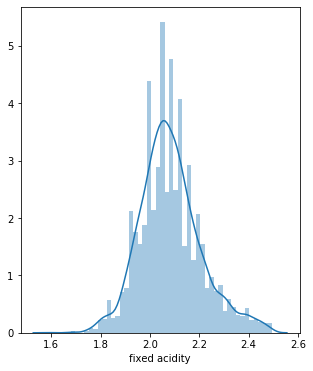

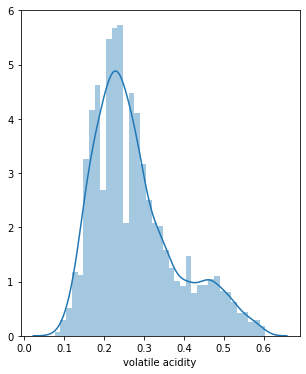

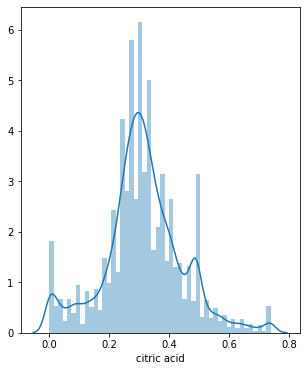

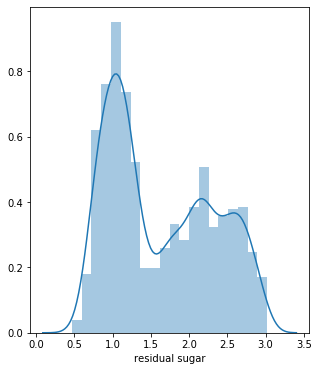

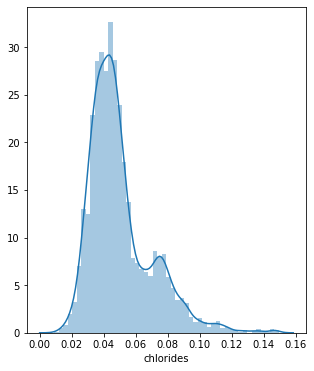

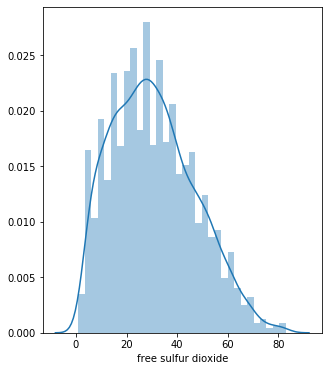

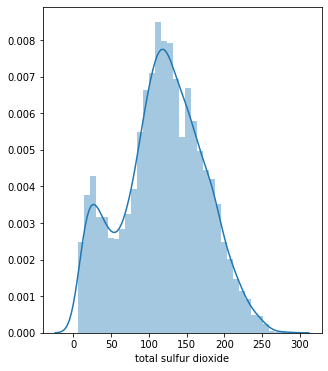

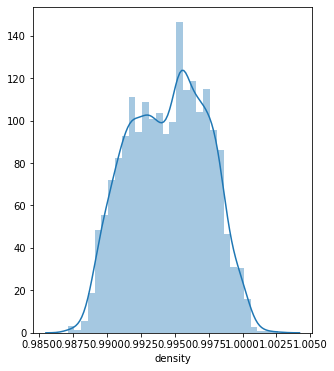

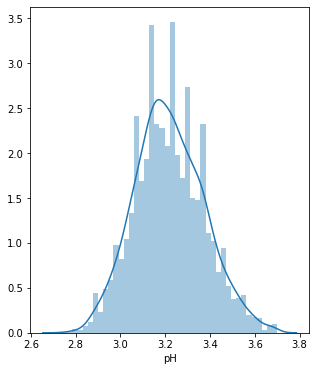

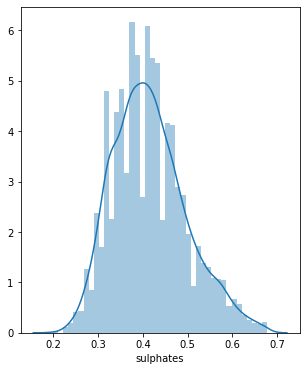

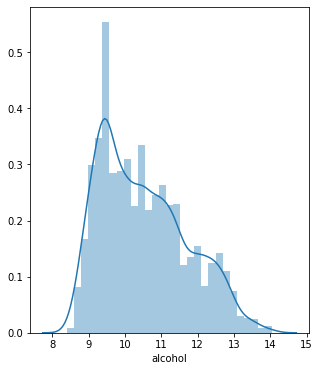

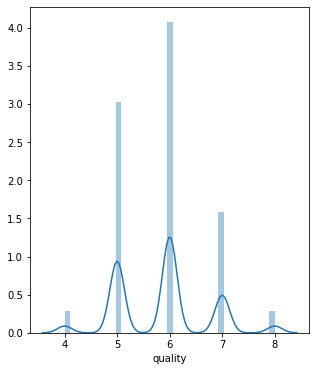

In [19]:
for i in df_zout.columns:
    if i != 'type':
        plt.figure(figsize=(5,6))
        sns.distplot(df_zout[i])
        plt.show()

In [20]:
df_zout.skew()

fixed acidity           0.487430
volatile acidity        0.921851
citric acid             0.135713
residual sugar          0.346013
chlorides               1.354871
free sulfur dioxide     0.444938
total sulfur dioxide   -0.094428
density                -0.053055
pH                      0.212639
sulphates               0.505395
alcohol                 0.541357
quality                 0.301387
type                   -1.400675
dtype: float64

In [21]:
#checking correlation of the data variables
df_cor = df_zout.corr()
df_cor

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.196601     0.238788   
volatile acidity           0.196601          1.000000    -0.419770   
citric acid                0.238788         -0.419770     1.000000   
residual sugar            -0.071787         -0.156086     0.153151   
chlorides                  0.359789          0.491515    -0.137594   
free sulfur dioxide       -0.235681         -0.343927     0.188659   
total sulfur dioxide      -0.253037         -0.394745     0.259480   
density                    0.413215          0.245627     0.041760   
pH                        -0.236798          0.255162    -0.293830   
sulphates                  0.219299          0.226699    -0.019234   
alcohol                   -0.117752         -0.033899    -0.001722   
quality                   -0.090473         -0.243482     0.082348   
type                      -0.427185         -0.648840     0.264488   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.071787   0.359789            -0.235681   
volatile acidity           -0.156086   0.491515            -0.343927   
citric acid                 0.153151  -0.137594             0.188659   
residual sugar              1.000000  -0.134142             0.433020   
chlorides                  -0.134142   1.000000            -0.258754   
free sulfur dioxide         0.433020  -0.258754             1.000000   
total sulfur dioxide        0.502290  -0.349971             0.718169   
density                     0.555923   0.489506             0.088629   
pH                         -0.262810   0.203754            -0.165620   
sulphates                  -0.166831   0.332032            -0.165352   
alcohol                    -0.343900  -0.323256            -0.193071   
quality                    -0.023663  -0.251656             0.070611   
type                        0.323729  -0.686777             0.461297   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.253037  0.413215 -0.236798   0.219299   
volatile acidity                 -0.394745  0.245627  0.255162   0.226699   
citric acid                       0.259480  0.041760 -0.293830  -0.019234   
residual sugar                    0.502290  0.555923 -0.262810  -0.166831   
chlorides                        -0.349971  0.489506  0.203754   0.332032   
free sulfur dioxide               0.718169  0.088629 -0.165620  -0.165352   
total sulfur dioxide              1.000000  0.098138 -0.259024  -0.248817   
density                           0.098138  1.000000  0.051610   0.241794   
pH                               -0.259024  0.051610  1.000000   0.294857   
sulphates                        -0.248817  0.241794  0.294857   1.000000   
alcohol                          -0.288291 -0.739544  0.091032  -0.001283   
quality                          -0.046646 -0.322905  0.024722   0.044321   
type                              0.683218 -0.358738 -0.371684  -0.463876   

                       alcohol   quality      type  
fixed acidity        -0.117752 -0.090473 -0.427185  
volatile acidity     -0.033899 -0.243482 -0.648840  
citric acid          -0.001722  0.082348  0.264488  
residual sugar       -0.343900 -0.023663  0.323729  
chlorides            -0.323256 -0.251656 -0.686777  
free sulfur dioxide  -0.193071  0.070611  0.461297  
total sulfur dioxide -0.288291 -0.046646  0.683218  
density              -0.739544 -0.322905 -0.358738  
pH                    0.091032  0.024722 -0.371684  
sulphates            -0.001283  0.044321 -0.463876  
alcohol               1.000000  0.455830  0.032523  
quality               0.455830  1.000000  0.114576  
type                  0.032523  0.114576  1.000000

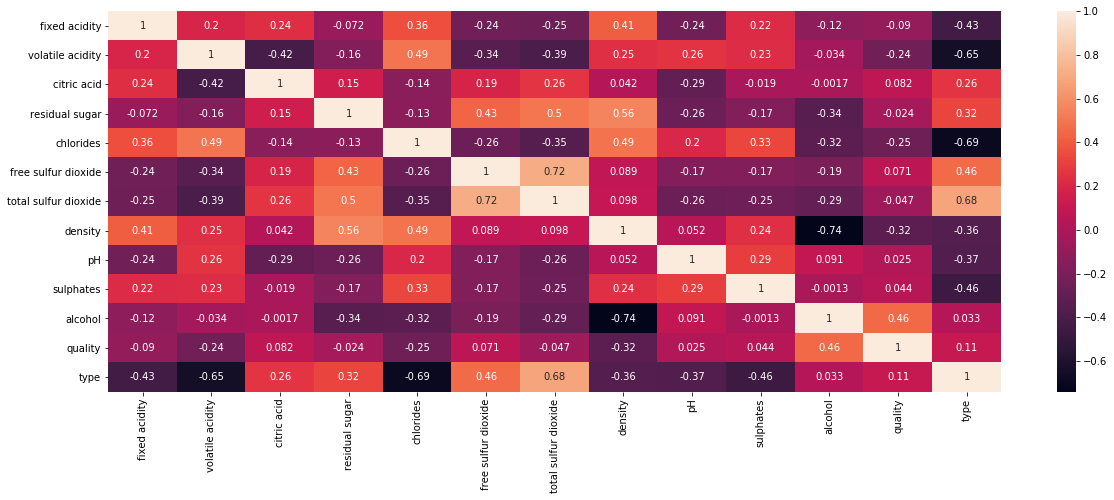

In [22]:
plt.subplots(figsize=(20,7))
sns.heatmap(df_cor,annot=True)

above we can see that alchohol and density are highly negetive correlated, so we can drop any one of them and same with free sulphur dioxide,total sulphur dioxide they are highly positive correlated

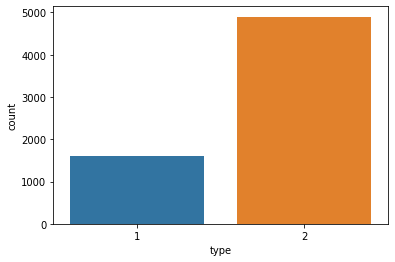

In [23]:
sns.countplot(df_all['type'])

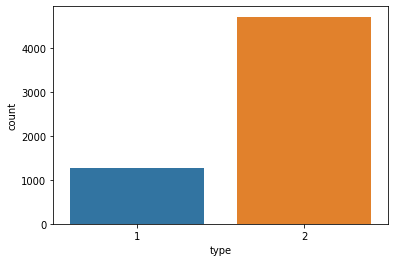

In [24]:
sns.countplot(df_zout['type'])

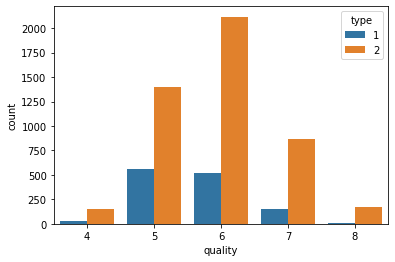

In [25]:
sns.countplot(df_zout['quality'],hue=df_zout['type'])

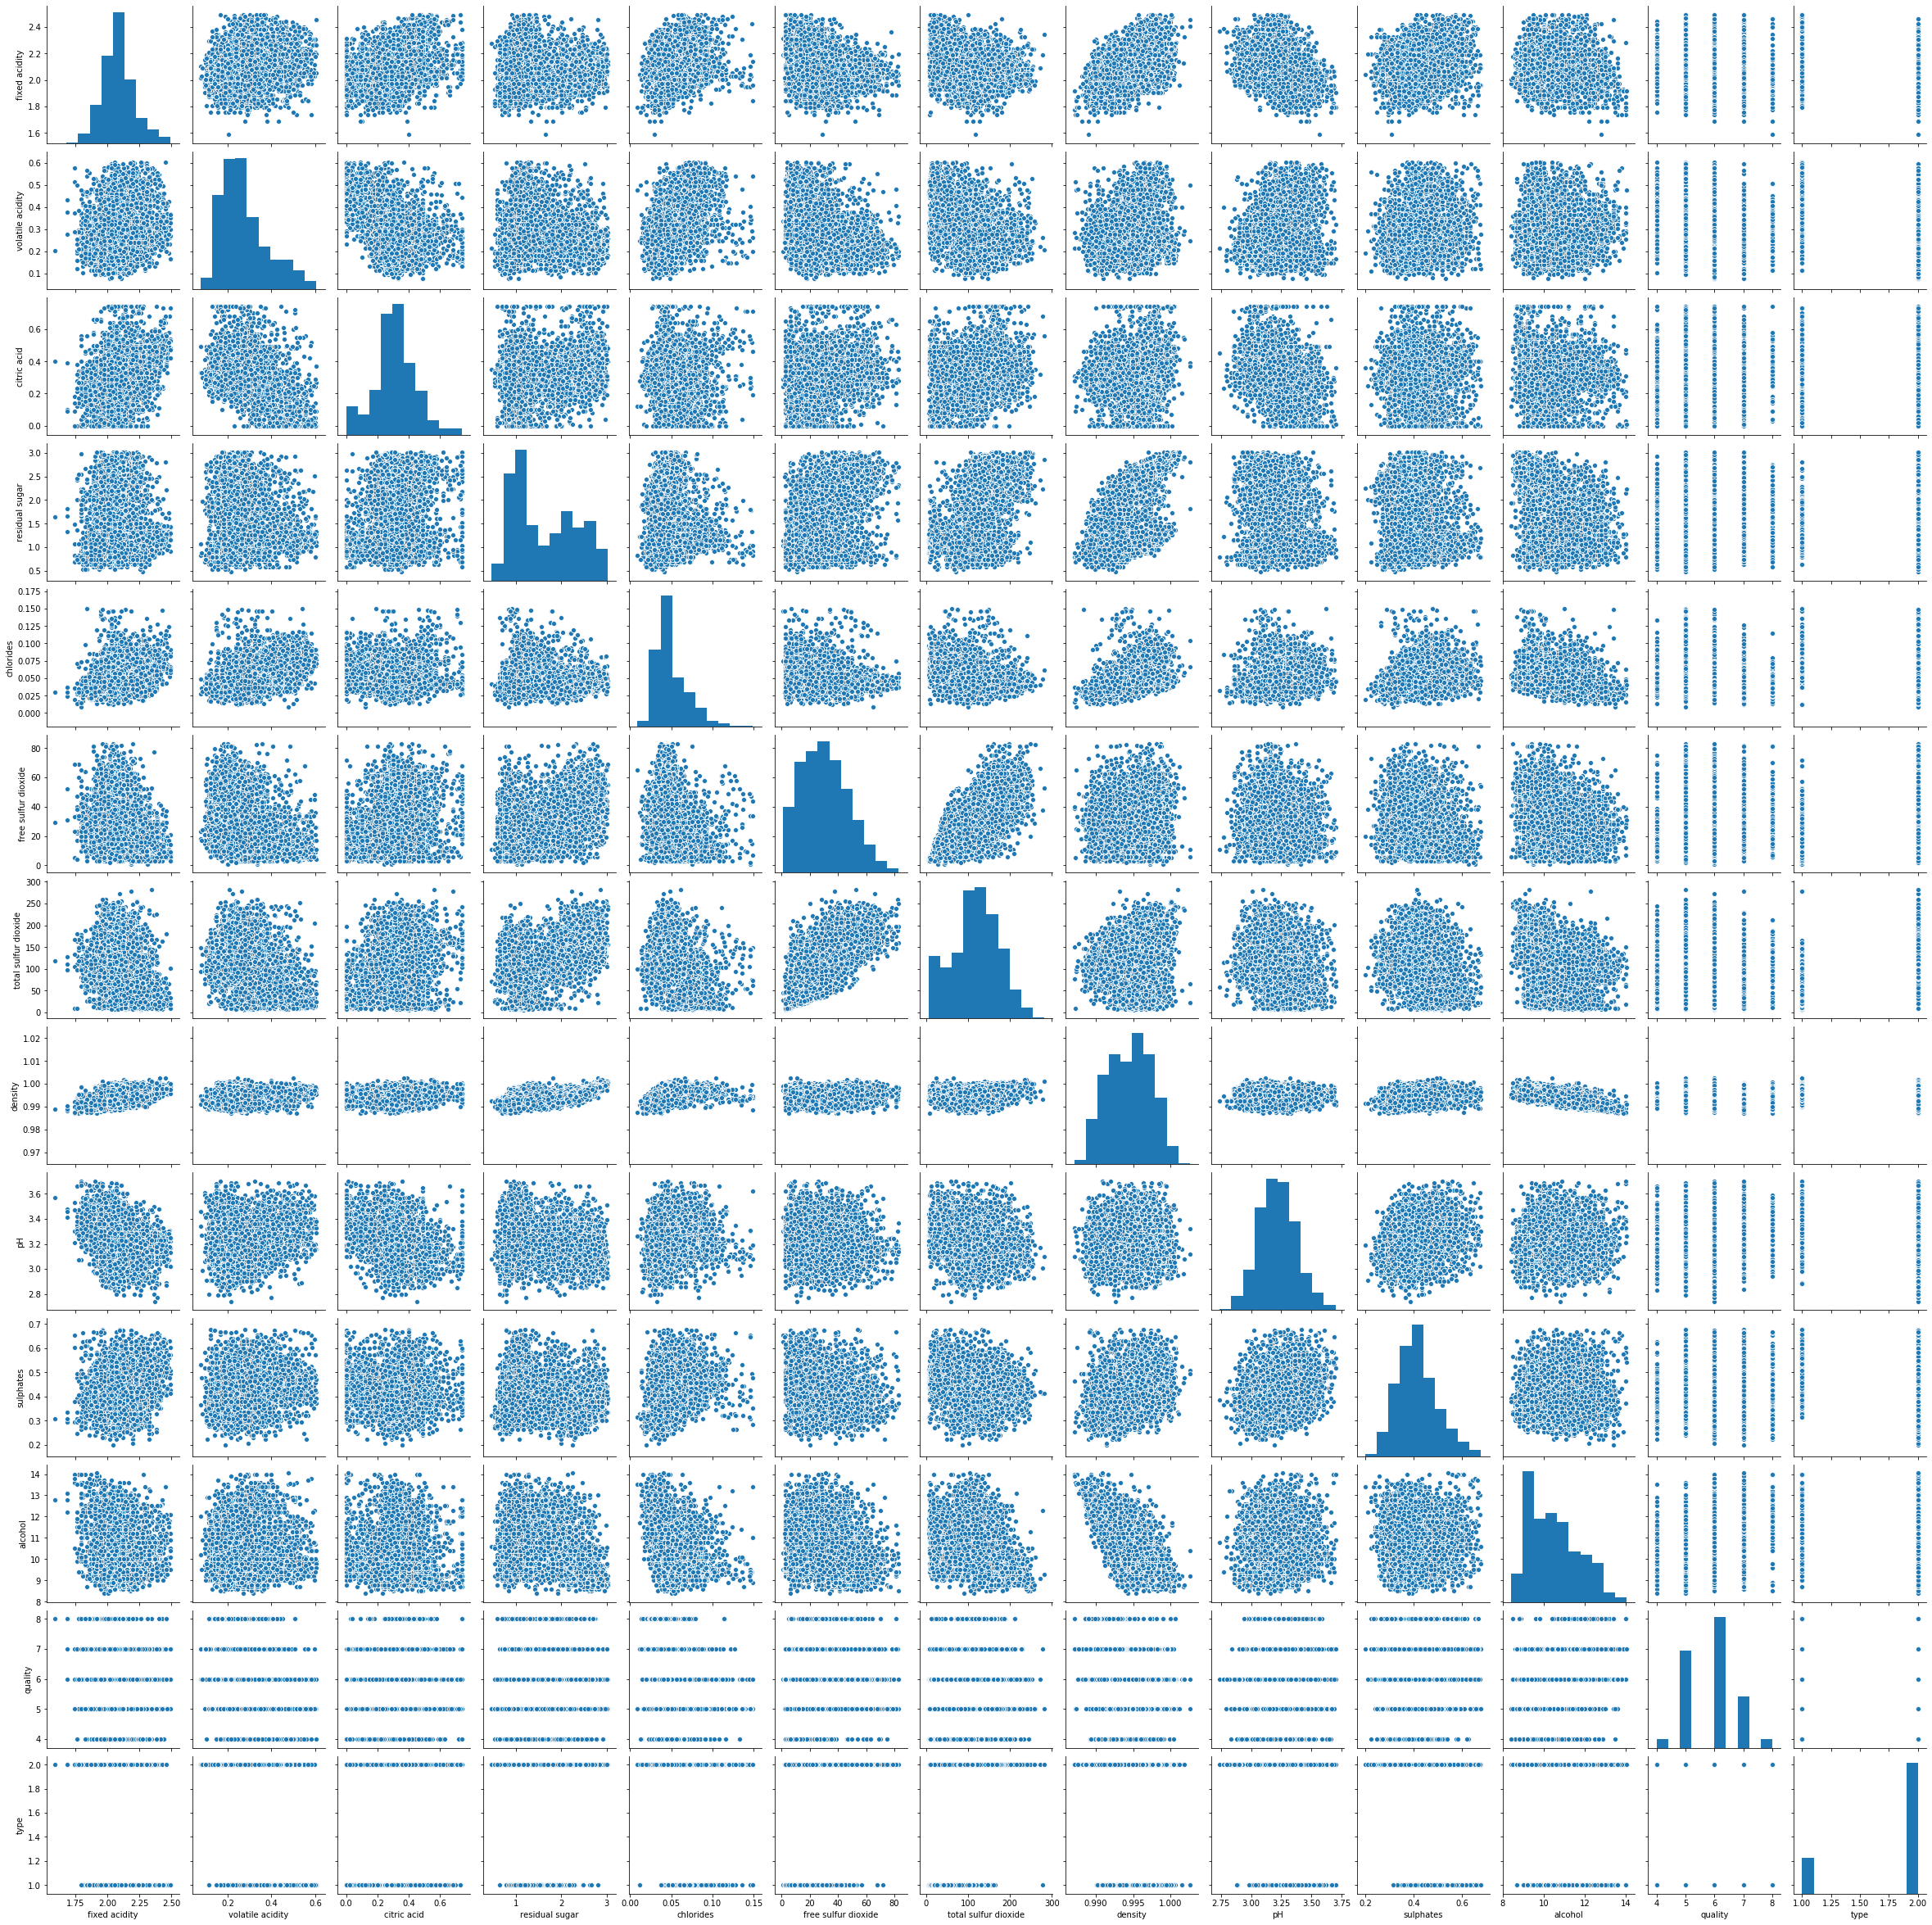

In [26]:
sns.pairplot(df_zout)

In [27]:
df_zout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5989 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5989 non-null   float64
 1   volatile acidity      5989 non-null   float64
 2   citric acid           5989 non-null   float64
 3   residual sugar        5989 non-null   float64
 4   chlorides             5989 non-null   float64
 5   free sulfur dioxide   5989 non-null   float64
 6   total sulfur dioxide  5989 non-null   float64
 7   density               5989 non-null   float64
 8   pH                    5989 non-null   float64
 9   sulphates             5989 non-null   float64
 10  alcohol               5989 non-null   float64
 11  quality               5989 non-null   int64  
 12  type                  5989 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 815.0 KB


In [28]:
df_zout.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       2.128232          0.530628         0.00        1.064711   0.073250   
2       2.174752          0.565314         0.04        1.193922   0.088011   
4       2.128232          0.530628         0.00        1.064711   0.073250   
5       2.128232          0.506818         0.00        1.029619   0.072321   
6       2.186051          0.470004         0.06        0.955511   0.066724   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51   0.444686   
2                 15.0                  54.0   0.9970  3.26   0.500775   
4                 11.0                  34.0   0.9978  3.51   0.444686   
5                 13.0                  40.0   0.9978  3.51   0.444686   
6                 15.0                  59.0   0.9964  3.30   0.378436   

   alcohol  quality  type  
0      9.4        5     1  
2      9.8        5     1  
4      9.4        5     1  
5      9.4        5     1  
6      9.4        5     1

In [29]:
#removing density and free sulfur dioxide variables 
df_zout.drop(['density','free sulfur dioxide'], axis=1, inplace=True)

In [30]:
df_zout.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       2.128232          0.530628         0.00        1.064711   0.073250   
2       2.174752          0.565314         0.04        1.193922   0.088011   
4       2.128232          0.530628         0.00        1.064711   0.073250   
5       2.128232          0.506818         0.00        1.029619   0.072321   
6       2.186051          0.470004         0.06        0.955511   0.066724   

   total sulfur dioxide    pH  sulphates  alcohol  quality  type  
0                  34.0  3.51   0.444686      9.4        5     1  
2                  54.0  3.26   0.500775      9.8        5     1  
4                  34.0  3.51   0.444686      9.4        5     1  
5                  40.0  3.51   0.444686      9.4        5     1  
6                  59.0  3.30   0.378436      9.4        5     1

In [31]:
col_names = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','total sulfur dioxide','pH','sulphates','alcohol','type','quality']
df_zout = df_zout.reindex(columns=col_names)

In [32]:
df_zout.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       2.128232          0.530628         0.00        1.064711   0.073250   
2       2.174752          0.565314         0.04        1.193922   0.088011   
4       2.128232          0.530628         0.00        1.064711   0.073250   
5       2.128232          0.506818         0.00        1.029619   0.072321   
6       2.186051          0.470004         0.06        0.955511   0.066724   

   total sulfur dioxide    pH  sulphates  alcohol  type  quality  
0                  34.0  3.51   0.444686      9.4     1        5  
2                  54.0  3.26   0.500775      9.8     1        5  
4                  34.0  3.51   0.444686      9.4     1        5  
5                  40.0  3.51   0.444686      9.4     1        5  
6                  59.0  3.30   0.378436      9.4     1        5

In [33]:
#splitting the data into inputs and outputs
X = df_zout.iloc[:,0:-1]
X.shape

(5989, 10)

In [34]:
y = df_zout.iloc[:,-1]
y.shape

(5989,)

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [37]:
X_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2072       2.028148          0.207014         0.27        1.887070   0.042101   
1860       2.041220          0.165514         0.19        1.740466   0.044973   
578        2.014903          0.246860         0.29        1.308333   0.037296   
4719       2.041220          0.139762         0.32        2.186051   0.033435   
2181       2.128232          0.254642         0.25        1.568616   0.043059   

      total sulfur dioxide    pH  sulphates  alcohol  type  
2072                 164.0  3.27   0.565314      9.5     2  
1860                 161.0  3.32   0.506818     10.5     2  
578                  107.0  3.32   0.343590     11.6     2  
4719                  81.0  3.29   0.270027     10.0     2  
2181                 114.0  3.11   0.336472     11.0     2

In [38]:
X_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2922       2.014903          0.364643         0.47        1.864080   0.013903   
1076       2.140066          0.246860         0.33        2.163323   0.046884   
1710       2.208274          0.270027         0.24        0.955511   0.031499   
1497       2.066863          0.553885         0.03        1.193922   0.052592   
3962       2.104134          0.457425         0.27        1.916923   0.031499   

      total sulfur dioxide    pH  sulphates  alcohol  type  
2922                 137.0  3.13   0.277632     13.0     2  
1076                 180.0  3.37   0.463734     10.1     2  
1710                  67.0  3.08   0.385262     10.5     2  
1497                  16.0  3.45   0.488580     11.5     1  
3962                 118.0  3.17   0.425268     13.0     2

In [39]:
y_train.head()

2922    8
1076    6
1710    5
1497    6
3962    7
Name: quality, dtype: int64

In [40]:
y_test.head()

2072    5
1860    6
578     7
4719    6
2181    6
Name: quality, dtype: int64

In [41]:
print('shape of X_train:', X_train.shape)
print('shape of X_test:', X_test.shape)
print('shape of y_train:', y_train.shape)
print('shape of y_test:', y_test.shape)

shape of X_train: (4192, 10)
shape of X_test: (1797, 10)
shape of y_train: (4192,)
shape of y_test: (1797,)


In [42]:
#doing feature scaling
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
sc.mean_

array([2.08185704e+00, 2.75685832e-01, 3.12619275e-01, 1.63728336e+00,
       4.96879377e-02, 1.18533635e+02, 3.21743082e+00, 4.13577998e-01,
       1.05016531e+01, 1.79556298e+00])

In [44]:
sc.scale_

array([1.23125596e-01, 1.04489573e-01, 1.33672474e-01, 6.87183076e-01,
       1.93654775e-02, 5.42270730e+01, 1.54538242e-01, 8.11379122e-02,
       1.18691604e+00, 4.03289631e-01])

In [45]:
X_train.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4192.000000       4192.000000  4192.000000     4192.000000   
mean        2.081857          0.275686     0.312619        1.637283   
std         0.123140          0.104502     0.133688        0.687265   
min         1.686399          0.076961     0.000000        0.470004   
25%         2.001480          0.198851     0.250000        1.029619   
50%         2.066863          0.246860     0.310000        1.458615   
75%         2.151762          0.322083     0.380000        2.230014   
max         2.493205          0.604316     0.740000        3.020425   

         chlorides  total sulfur dioxide           pH    sulphates  \
count  4192.000000           4192.000000  4192.000000  4192.000000   
mean      0.049688            118.533635     3.217431     0.413578   
std       0.019368             54.233542     0.154557     0.081148   
min       0.011929              7.000000     2.740000     0.198851   
25%       0.036332             85.000000     3.110000     0.357674   
50%       0.044973            121.000000     3.210000     0.405465   
75%       0.056380            156.000000     3.320000     0.463734   
max       0.149282            282.000000     3.700000     0.678034   

           alcohol         type  
count  4192.000000  4192.000000  
mean     10.501653     1.795563  
std       1.187058     0.403338  
min       8.400000     1.000000  
25%       9.500000     2.000000  
50%      10.400000     2.000000  
75%      11.300000     2.000000  
max      14.050000     2.000000

In [46]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [47]:
X_train_sc_df = pd.DataFrame(X_train_sc, columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','total sulfur dioxide','pH','sulphates','alcohol','type'])

In [48]:
X_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2922       2.014903          0.364643         0.47        1.864080   0.013903   
1076       2.140066          0.246860         0.33        2.163323   0.046884   
1710       2.208274          0.270027         0.24        0.955511   0.031499   
1497       2.066863          0.553885         0.03        1.193922   0.052592   
3962       2.104134          0.457425         0.27        1.916923   0.031499   

      total sulfur dioxide    pH  sulphates  alcohol  type  
2922                 137.0  3.13   0.277632     13.0     2  
1076                 180.0  3.37   0.463734     10.1     2  
1710                  67.0  3.08   0.385262     10.5     2  
1497                  16.0  3.45   0.488580     11.5     1  
3962                 118.0  3.17   0.425268     13.0     2

In [49]:
X_train_sc_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.543786          0.851351     1.177361        0.330038  -1.847878   
1       0.472762         -0.275872     0.130025        0.765501  -0.144812   
2       1.026735         -0.054156    -0.543263       -0.992126  -0.939263   
3      -0.121780          2.662460    -2.114267       -0.645186   0.149984   
4       0.180930          1.739303    -0.318834        0.406936  -0.939263   

   total sulfur dioxide        pH  sulphates   alcohol      type  
0              0.340538 -0.565755  -1.675496  2.104906  0.506924  
1              1.133500  0.987258   0.618158 -0.338401  0.506924  
2             -0.950330 -0.889300  -0.348981 -0.001393  0.506924  
3             -1.890820  1.504930   0.924377  0.841127 -1.972684  
4             -0.009841 -0.306920   0.144072  2.104906  0.506924

In [50]:
X_test_sc_df = pd.DataFrame(X_test_sc, columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','total sulfur dioxide','pH','sulphates','alcohol','type'])

In [51]:
X_test_sc_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.436211         -0.657211    -0.318834        0.363493  -0.391767   
1      -0.330043         -1.054377    -0.917311        0.150153  -0.243452   
2      -0.543786         -0.275872    -0.169214       -0.478694  -0.639909   
3      -0.330043         -1.300837     0.055215        0.798576  -0.839285   
4       0.376645         -0.201394    -0.468453       -0.099926  -0.342282   

   total sulfur dioxide        pH  sulphates   alcohol      type  
0              0.838444  0.340169   1.870098 -0.843912  0.506924  
1              0.783121  0.663714   1.149150 -0.001393  0.506924  
2             -0.212691  0.663714  -0.862584  0.925379  0.506924  
3             -0.692157  0.469587  -1.769221 -0.422653  0.506924  
4             -0.083605 -0.695173  -0.950305  0.419867  0.506924

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

CREATING LOGISTIC REGRESSION MODEL ON UNSTANDARDISED DATA

In [54]:
lg = LogisticRegression()

In [55]:
lg_model = lg.fit(X_train,y_train)
lg_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
pred = lg.predict(X_test)
print(pred)

[5 6 6 ... 5 6 5]


In [57]:
print("Accuracy score :", accuracy_score(y_test,pred))

Accuracy score : 0.48970506399554814


In [58]:
print("confusion metrix:", confusion_matrix(y_test,pred))

confusion metrix: [[  0  29  23   1   0]
 [  0 354 229   3   0]
 [  0 245 506  44   0]
 [  0  44 242  20   0]
 [  0   5  46   6   0]]


In [59]:
print("Classification report :",classification_report(y_test,pred))

Classification report :               precision    recall  f1-score   support

           4       0.00      0.00      0.00        53
           5       0.52      0.60      0.56       586
           6       0.48      0.64      0.55       795
           7       0.27      0.07      0.11       306
           8       0.00      0.00      0.00        57

    accuracy                           0.49      1797
   macro avg       0.26      0.26      0.24      1797
weighted avg       0.43      0.49      0.44      1797



CREATING LOGISTIC REGRESSION MODEL ON STANDARDISED DATA

In [60]:
lg_model_sc = lg.fit(X_train_sc_df,y_train)
lg_model_sc

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
pred_sc = lg.predict(X_test_sc_df)
print(pred_sc)

[6 6 6 ... 5 6 5]


In [62]:
print("Accuracy score :", accuracy_score(y_test,pred_sc))

Accuracy score : 0.5470228158041179


In [63]:
print("confusion metrix:", confusion_matrix(y_test,pred_sc))

confusion metrix: [[  2  35  15   1   0]
 [  0 352 229   5   0]
 [  0 172 563  60   0]
 [  0  17 223  66   0]
 [  2   0  36  19   0]]


In [64]:
print("Classification report :",classification_report(y_test,pred_sc))

Classification report :               precision    recall  f1-score   support

           4       0.50      0.04      0.07        53
           5       0.61      0.60      0.61       586
           6       0.53      0.71      0.61       795
           7       0.44      0.22      0.29       306
           8       0.00      0.00      0.00        57

    accuracy                           0.55      1797
   macro avg       0.42      0.31      0.31      1797
weighted avg       0.52      0.55      0.52      1797



In [65]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()

In [66]:
dc_model = dc.fit(X_train_sc_df,y_train)
dc_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [67]:
dc_pred = dc.predict(X_test_sc_df)
dc_pred

array([5, 6, 6, ..., 5, 5, 6], dtype=int64)

In [68]:
print('Accuracy score by Decision tree :', accuracy_score(y_test,dc_pred))

Accuracy score by Decision tree : 0.6048970506399555


In [69]:
from sklearn.svm import SVC
svc = SVC()

In [70]:
SVC_model = svc.fit(X_train_sc_df,y_train)
SVC_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [71]:
SVC_pred = svc.predict(X_test_sc_df)
SVC_pred

array([6, 6, 6, ..., 5, 5, 5], dtype=int64)

In [72]:
print("Accuracy score of SVC is :", accuracy_score(y_test,SVC_pred))

Accuracy score of SVC is : 0.565386755703951


In [76]:
#creating GaussianNB classfier model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [77]:
gnb_model = gnb.fit(X_train_sc_df,y_train)
gnb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [78]:
gnb.score(X_train_sc_df,y_train)

0.49570610687022904

In [79]:
gnb_predict = gnb.predict(X_test_sc_df)
gnb_predict

array([6, 6, 7, ..., 5, 5, 5], dtype=int64)

In [81]:
print("Accuracy score of gnb is :", accuracy_score(y_test,gnb_predict))

Accuracy score of gnb is : 0.46800222593210905


In [82]:
print("confusion metrix:", confusion_matrix(y_test,gnb_predict))

confusion metrix: [[  0  30  20   3   0]
 [  0 283 273  30   0]
 [  0 197 415 183   0]
 [  0  27 136 143   0]
 [  0   4  19  34   0]]


In [83]:
print("Classification report :",classification_report(y_test,gnb_predict))

Classification report :               precision    recall  f1-score   support

           4       0.00      0.00      0.00        53
           5       0.52      0.48      0.50       586
           6       0.48      0.52      0.50       795
           7       0.36      0.47      0.41       306
           8       0.00      0.00      0.00        57

    accuracy                           0.47      1797
   macro avg       0.27      0.29      0.28      1797
weighted avg       0.45      0.47      0.45      1797



In [86]:
#saving the model
from sklearn.externals import joblib

In [87]:
joblib.dump(dc_pred,'winequality.pkl')

['winequality.pkl']